# Lesson 2: Basic Calculations and Graphs

To jump to the recap, click [here](#recap)

# Initial Setup

Import libraries and initialize variables to pick up where we left off in Lesson 1.

In [1]:
import pandas as pd

In [2]:
weather_yvr = pd.read_csv('data/weather_yvr.csv')

# Working with DataFrame Columns

In [3]:
weather_yvr.head()

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%)
0,2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0
1,2018-05-21 23:00:00,23,Clear,13.5,76.0
2,2018-05-22 00:00:00,0,Clear,13.1,77.0
3,2018-05-22 01:00:00,1,Clear,12.9,84.0
4,2018-05-22 02:00:00,2,Clear,12.2,88.0


We can access a specific column of a DataFrame using the column name and square brackets:

In [4]:
weather_yvr['Temperature (C)']

0     14.8
1     13.5
2     13.1
3     12.9
4     12.2
5     12.0
6     11.9
7     10.4
8     11.0
9     13.0
10    14.8
11    15.8
12    15.9
13    16.1
14    17.4
15    18.2
16    18.8
17    19.5
18    19.4
19    20.1
20    19.7
21    19.6
22    18.4
23    16.1
Name: Temperature (C), dtype: float64

The numbers on the left are the **index**

We can create a new variable from a DataFrame column:

In [5]:
temperature = weather_yvr['Temperature (C)']

In [6]:
temperature

0     14.8
1     13.5
2     13.1
3     12.9
4     12.2
5     12.0
6     11.9
7     10.4
8     11.0
9     13.0
10    14.8
11    15.8
12    15.9
13    16.1
14    17.4
15    18.2
16    18.8
17    19.5
18    19.4
19    20.1
20    19.7
21    19.6
22    18.4
23    16.1
Name: Temperature (C), dtype: float64

What data type is `temperature`?

In [7]:
type(temperature)

pandas.core.series.Series

- **DataFrame:** 2-dimensional array, like a table in a spreadsheet
  - The rows are axis 0
  - The columns are axis 1
- **Series:** 1-dimensional array, like a single column or row in a spreadsheet

Let's look at the Series again:

In [8]:
temperature

0     14.8
1     13.5
2     13.1
3     12.9
4     12.2
5     12.0
6     11.9
7     10.4
8     11.0
9     13.0
10    14.8
11    15.8
12    15.9
13    16.1
14    17.4
15    18.2
16    18.8
17    19.5
18    19.4
19    20.1
20    19.7
21    19.6
22    18.4
23    16.1
Name: Temperature (C), dtype: float64

The last line of the output above tells us that our Series `temperature` is named `'Temperature (C)'` and its data type is `float64`.

We can find out the length of the Series with the `len` function:

In [9]:
len(temperature)

24

Many of the methods we use on a DataFrame can also be used on a Series, and vice versa

In [10]:
temperature.head()

0    14.8
1    13.5
2    13.1
3    12.9
4    12.2
Name: Temperature (C), dtype: float64

In [11]:
temperature.describe()

count    24.000000
mean     15.608333
std       3.119492
min      10.400000
25%      12.975000
50%      15.850000
75%      18.500000
max      20.100000
Name: Temperature (C), dtype: float64

We can perform calculations on a Series.

- Let's compute fractional relative humidity from the percentages in our data:

In [12]:
rh = weather_yvr['Relative Humidity (%)']
rh.head()

0    75.0
1    76.0
2    77.0
3    84.0
4    88.0
Name: Relative Humidity (%), dtype: float64

In [13]:
rh_frac = rh / 100
rh_frac.head()

0    0.75
1    0.76
2    0.77
3    0.84
4    0.88
Name: Relative Humidity (%), dtype: float64

We can add this data to our DataFrame as a new column `'Relative Humidity (fraction)'`:

In [14]:
weather_yvr['Relative Humidity (fraction)'] = rh_frac

In [15]:
weather_yvr.head()

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Relative Humidity (fraction)
0,2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0,0.75
1,2018-05-21 23:00:00,23,Clear,13.5,76.0,0.76
2,2018-05-22 00:00:00,0,Clear,13.1,77.0,0.77
3,2018-05-22 01:00:00,1,Clear,12.9,84.0,0.84
4,2018-05-22 02:00:00,2,Clear,12.2,88.0,0.88


The previous steps could be consolidated into a single command:

In [16]:
weather_yvr['Relative Humidity (fraction)'] = weather_yvr['Relative Humidity (%)'] / 100

# Saving to a CSV file

Now that we've added a new column, let's save the DataFrame to a new CSV file using the `to_csv` method:

In [17]:
weather_yvr.to_csv('data/weather_yvr_extra.csv')

Check out your new file in the Jupyter Lab CSV viewer!

# Creating Graphs

- `pandas` DataFrames and Series provide methods to quickly and easily plot your data
- These methods use the `matplotlib` library behind the scenes

First we need to use the magic command `%matplotlib inline` so that our plots will display inline in our Jupyter notebook
- This command only needs to be run once, and it's good practice to put it at the start of your notebook with the `import` commands

In [18]:
%matplotlib inline

Let's use the `plot` method of our DataFrame and see what happens:

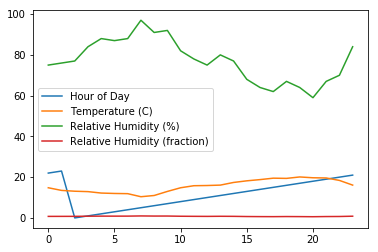

In [19]:
weather_yvr.plot()

- Each numeric column in the DataFrame has been plotted as a line, on the same scale
- The x-axis is the DataFrame's index, which in this case is just the row number

- Our graph would look better if each column were plotted on a separate scale
- It would also be nice if the graph were bigger
- The documentation for the `plot` method lists keyword arguments that can be used to customize our plot

In [20]:
weather_yvr.plot?

The keyword arguments `subplots` and `figsize` will help us improve our plot:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D565B286D8>,
      dtype=object)

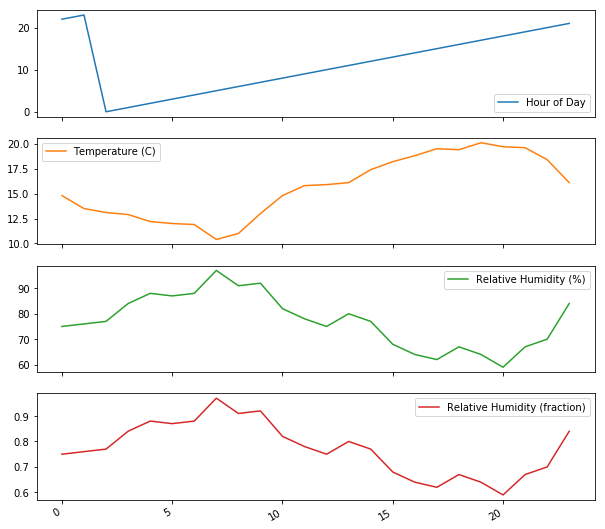

In [21]:
weather_yvr.plot(subplots=True, figsize=(10, 10))

The `plot` method returns some `matplotlib.Axes` objects, which are displayed as cell output
- To suppress displaying this output, add a semi-colon to the end of the command

We can also plot a single column of our DataFrame:

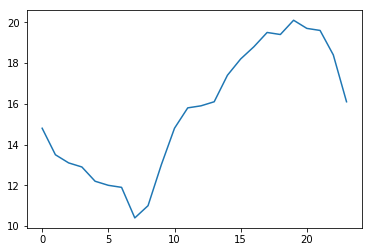

In [22]:
weather_yvr['Temperature (C)'].plot();

- Our x-axis is the row numbers of the DataFrame, which isn't very useful
- Since we're looking at **timeseries** data, it would be much better to have the date and time on the x-axis
- Luckily, `pandas` makes it very easy to do this!
  - In `Lesson_2.ipynb`, there is an extra section that walks through converting the `'Datetime'` column from text to a `datetime` data type and plotting the data as timeseries

`pandas` has extremely powerful functionality for working with **timeseries** data:
- Parse dates and times into their components (year, month, day, hour, etc.)
- Extract a subset of a DataFrame or Series for a specified date range
- Convert between different time zones
- Aggregate on different timescales (e.g. yearly / monthly / weekly / etc. means or totals)
- Resampling (e.g. daily means of hourly data)
- Rolling windows
- and much more!

*For more details and examples: https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html*

# Timeseries Data

This section is optional. To skip to the next section, click [here](#next).

We have a `'Datetime'` column in `weather_yvr` which is currently just treated as text:

In [23]:
weather_yvr['Datetime']

0     2018-05-21 22:00:00
1     2018-05-21 23:00:00
2     2018-05-22 00:00:00
3     2018-05-22 01:00:00
4     2018-05-22 02:00:00
5     2018-05-22 03:00:00
6     2018-05-22 04:00:00
7     2018-05-22 05:00:00
8     2018-05-22 06:00:00
9     2018-05-22 07:00:00
10    2018-05-22 08:00:00
11    2018-05-22 09:00:00
12    2018-05-22 10:00:00
13    2018-05-22 11:00:00
14    2018-05-22 12:00:00
15    2018-05-22 13:00:00
16    2018-05-22 14:00:00
17    2018-05-22 15:00:00
18    2018-05-22 16:00:00
19    2018-05-22 17:00:00
20    2018-05-22 18:00:00
21    2018-05-22 19:00:00
22    2018-05-22 20:00:00
23    2018-05-22 21:00:00
Name: Datetime, dtype: object

The `pandas` function `to_datetime` will convert this data from text to a `datetime` data type:

In [24]:
times = pd.to_datetime(weather_yvr['Datetime'])

In [25]:
times

0    2018-05-21 22:00:00
1    2018-05-21 23:00:00
2    2018-05-22 00:00:00
3    2018-05-22 01:00:00
4    2018-05-22 02:00:00
5    2018-05-22 03:00:00
6    2018-05-22 04:00:00
7    2018-05-22 05:00:00
8    2018-05-22 06:00:00
9    2018-05-22 07:00:00
10   2018-05-22 08:00:00
11   2018-05-22 09:00:00
12   2018-05-22 10:00:00
13   2018-05-22 11:00:00
14   2018-05-22 12:00:00
15   2018-05-22 13:00:00
16   2018-05-22 14:00:00
17   2018-05-22 15:00:00
18   2018-05-22 16:00:00
19   2018-05-22 17:00:00
20   2018-05-22 18:00:00
21   2018-05-22 19:00:00
22   2018-05-22 20:00:00
23   2018-05-22 21:00:00
Name: Datetime, dtype: datetime64[ns]

The variable `times` is a Series with `dtype` of `datetime64[ns]`

With data in `datetime` format, we can do things like extract the year, month, day, hour, etc using `dt` attributes (see the documentation `times.dt?` for details)

In [26]:
times.dt?

In [27]:
times.dt.year

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
20    2018
21    2018
22    2018
23    2018
Name: Datetime, dtype: int64

Let's create a copy of our DataFrame and convert the `'Datetime'` column from text to `datetime` format.

In [28]:
weather_yvr_dt = weather_yvr.copy()

In [29]:
weather_yvr_dt['Datetime'] = pd.to_datetime(weather_yvr_dt['Datetime'])

In [30]:
weather_yvr_dt.head()

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Relative Humidity (fraction)
0,2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0,0.75
1,2018-05-21 23:00:00,23,Clear,13.5,76.0,0.76
2,2018-05-22 00:00:00,0,Clear,13.1,77.0,0.77
3,2018-05-22 01:00:00,1,Clear,12.9,84.0,0.84
4,2018-05-22 02:00:00,2,Clear,12.2,88.0,0.88


Although the `'Datetime'` column looks the same as before, its `dtype` has changed from `object` to `datetime64[ns]`:

In [31]:
weather_yvr_dt.dtypes

Datetime                        datetime64[ns]
Hour of Day                              int64
Conditions                              object
Temperature (C)                        float64
Relative Humidity (%)                  float64
Relative Humidity (fraction)           float64
dtype: object

Now we need to change the index of our DataFrame from the row numbers to the `datetime` columns. We use the `set_index` method for this:

In [32]:
weather_yvr_dt = weather_yvr_dt.set_index('Datetime')
weather_yvr_dt.head()

,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Relative Humidity (fraction)
Datetime,,,,,
2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0,0.75
2018-05-21 23:00:00,23,Clear,13.5,76.0,0.76
2018-05-22 00:00:00,0,Clear,13.1,77.0,0.77
2018-05-22 01:00:00,1,Clear,12.9,84.0,0.84
2018-05-22 02:00:00,2,Clear,12.2,88.0,0.88


Now the index in bold on the left shows the values from the `'Datetime'` column instead of the row numbers, and `'Datetime'` is no longer a column in our DataFrame.

We could have done all the above steps automatically when reading from the CSV file, using keyword arguments to set the `'Datetime'` column as the index, and telling `pandas` to parse dates from the index:
```
weather_yvr = pd.read_csv('data/weather_YVR.csv', index_col=0, parse_dates=True)
```

When we plot `weather_yvr_dt`, the x-axis is the `datetime` values instead of the row numbers:

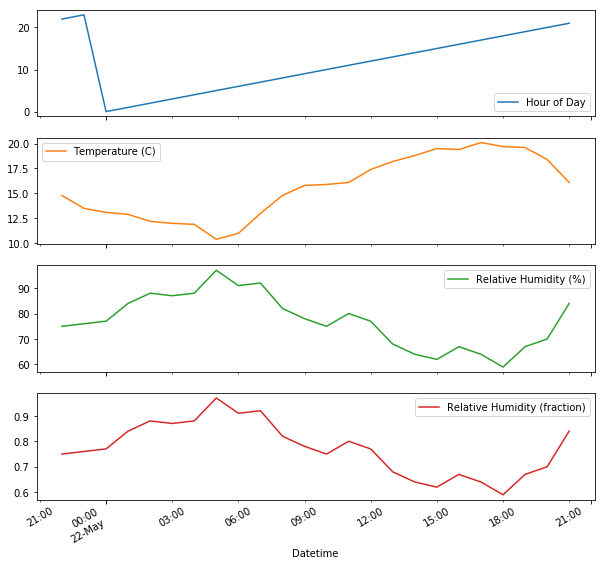

In [33]:
weather_yvr_dt.plot(subplots=True, figsize=(10, 10));

We can also plot one column at a time:

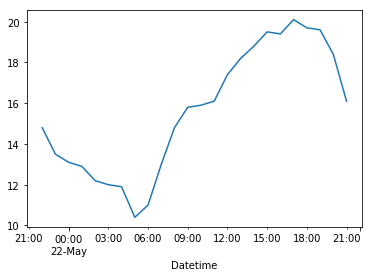

In [34]:
weather_yvr_dt['Temperature (C)'].plot();

<a id="next"></a>
Here's what the last plot looks like as a timeseries, and bit of additional formatting:

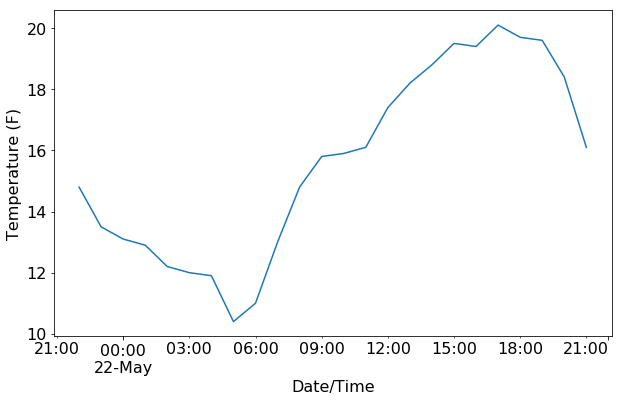

In [35]:
weather_yvr_dt = pd.read_csv('data/weather_YVR.csv', index_col=0, parse_dates=True)
ax = weather_yvr_dt['Temperature (C)'].plot(figsize=(10, 6));
labelsize = 16
ax.tick_params(labelsize=labelsize, which='both')
ax.set_xlabel('Date/Time', fontsize=labelsize)
ax.set_ylabel('Temperature (F)', fontsize=labelsize);

There are many more ways we could customize our plots (labels, axes limits and ticks, colours, etc.) and many other types of plots that can be created with `pandas` and `matplotlib`. For more details and examples:
- https://pandas.pydata.org/pandas-docs/stable/visualization.html
- https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
- https://matplotlib.org/tutorials/introductory/sample_plots.html

<a id="recap"></a>
# Lesson 2 Recap

### DataFrames and Series

DataFrames and Series are both data types that belong to the `pandas` library.

- **DataFrame:** 2-dimensional array, like a table in a spreadsheet
  - The rows are axis 0
  - The columns are axis 1
- **Series:** 1-dimensional array, like a single column or row in a spreadsheet

### Working with DataFrame Columns

Each column of a DataFrame is a Series.
```
series_X = df['X']
```

Performing basic calculations:
```
double_X = 2 * df['X']
```

Adding a new column to a DataFrame: 
```
df['Double X'] = 2 * df['X']
```

### Saving to CSV

Saving a DataFrame to a CSV file: 
```
df.to_csv('cool_output.csv')
```

### Simple Graphs

To display `pandas` / `matplotlib` graphs inline in your notebook, you need to run the following magic command:
```
%matplotlib inline
```
- This command only needs to be run once in a notebook
- It's good practice to run this command at the same time as your `import` commands, near the start of your notebook

#### Creating Line Plots

For a Series:
```
series.plot()
```
For a single column of a DataFrame:
```
df['Column A'].plot()
```

For all columns in a DataFrame, with each column as a line on the same plot:
```
df.plot()
```

For all columns in a DataFrame, with a separate subplot for each column:
```
df.plot(subplots=True)
```

To adjust the size of a graph, use the `figsize` keyword argument to the `plot` method, where `figsize` is a tuple of (width, height). For example to create a figure with subplots that is 6" wide by 8" tall:
```
df.plot(subplots=True, figsize=(6, 8))
```

# Exercise 2

a) Add a column to your `weather_yvr` DataFrame which has the temperature in degrees Fahrenheit (to convert from Celsius to Fahrenheit, multiply the temperature in degrees C by 1.8 and add 32)

b) Save the DataFrame with this extra column to a new CSV file

c) Create a line plot of the temperature in degrees Fahrenheit


##### Bonus exercises

d) Work through the examples in the extra section "Timeseries Data" of `Lesson_2.ipynb`

e) Create a plot of the YVR temperature in Fahrenheit with the date and time as the x-axis, and figure size of 8" wide by 5" tall

a) Add a column to your `weather_yvr` DataFrame which has the temperature in degrees Fahrenheit

In [36]:
weather_yvr['Temperature (F)'] = 1.8 * weather_yvr['Temperature (C)'] + 32
weather_yvr.head()

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Relative Humidity (fraction),Temperature (F)
0,2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0,0.75,58.64
1,2018-05-21 23:00:00,23,Clear,13.5,76.0,0.76,56.30
2,2018-05-22 00:00:00,0,Clear,13.1,77.0,0.77,55.58
3,2018-05-22 01:00:00,1,Clear,12.9,84.0,0.84,55.22
4,2018-05-22 02:00:00,2,Clear,12.2,88.0,0.88,53.96


b) Save the DataFrame with this extra column to a new CSV file

In [37]:
weather_yvr.to_csv('data/weather_yvr_extra2.csv')

c) Create a line plot of the temperature in degrees Fahrenheit

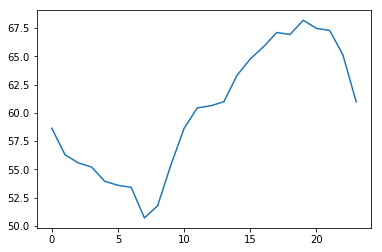

In [38]:
weather_yvr['Temperature (F)'].plot();

d) See the "Timeseries Data" section of `Lesson_2.ipynb`

e) Create a plot of the YVR temperature in Fahrenheit with the date and time as the x-axis, and figure size of 8" wide by 5" tall

In [39]:
# First create a copy of weather_yvr (which has the extra column with temperature in Fahrenheit)
weather_yvr_dt = weather_yvr.copy()

# Convert the 'Datetime' column to datetime format
weather_yvr_dt['Datetime'] = pd.to_datetime(weather_yvr_dt['Datetime'])

# Set the 'Datetime' column as the index
weather_yvr_dt = weather_yvr_dt.set_index('Datetime')
weather_yvr_dt.head()

,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Relative Humidity (fraction),Temperature (F)
Datetime,,,,,,
2018-05-21 22:00:00,22,Mainly Clear,14.8,75.0,0.75,58.64
2018-05-21 23:00:00,23,Clear,13.5,76.0,0.76,56.30
2018-05-22 00:00:00,0,Clear,13.1,77.0,0.77,55.58
2018-05-22 01:00:00,1,Clear,12.9,84.0,0.84,55.22
2018-05-22 02:00:00,2,Clear,12.2,88.0,0.88,53.96


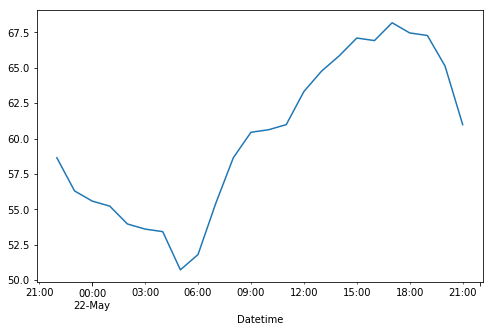

In [40]:
weather_yvr_dt['Temperature (F)'].plot(figsize=(8, 5));

# Interlude: More Complex Calculations

- So far we've performed simple arithmetic on columns of a DataFrame, which we can easily do in Excel
- As the complexity of our calculations increases, the power of `pandas` can make things much easier

For example, suppose we have some data of monthly sales for each employee. The employees are paid commissions on a tiered system:

| Monthly Sales  | Commission Rate |
| -------------- | --------------- |
| \$0 - \$999.99   | 0% |
| \$1000.00 - \$1999.99 | 1% |
| \$2000.00 - \$2999.99 | 3% |
| \$3000.00 and up | 5% |

- We could calculate the commission rates for each employee in Excel using a long, unwieldy set of nested IF formulas 
- If you had several different commission tier systems, say for different sets of products or services, you couldn't just reuse this formula&mdash;you'd have to manually edit it for each case

### The `pandas` Way

- Write a few lines of code bundled up into a re-usable function
- Apply this function to the appropriate column of your DataFrame to calculate the commissions
- Easily adjust the commission tiers and perform these calculations on many different data sets

### Example

This is a demo of the overall approach we can use to solve this type of problem in `pandas`
- Don't worry about following the details of the code (there's some stuff we haven't covered yet!)

In [41]:
sales = pd.read_csv('data/employee_sales.csv')
print(sales.shape)
sales.head()

(369, 4)


,Year,Month,Employee,Sales
0,2015,1,Malcolm Reynolds,2834.90
1,2015,1,Kaylee Frye,1423.83
2,2015,1,Inara Serra,1515.99
3,2015,1,Jayne Cobb,2708.44
4,2015,1,River Tam,1537.65


Define a function to calculate the commission rate for a given monthly sales value:

In [42]:
from bisect import bisect

def commission_rate(sales_value, tier_ceiling=[1000, 2000, 3000],
                    rates=[0, 0.01, 0.03, 0.05]):
    index = bisect(tier_ceiling, sales_value)
    return rates[index]

- Apply this function to the `'Sales'` column to find the commission rate for each employee in each month
- Calculate the total commissions for each employee in each month

In [43]:
sales['Commission Rate'] = sales['Sales'].apply(commission_rate)
sales['Commission'] = round(sales['Commission Rate'] * sales['Sales'], 2)
sales.head(20)

,Year,Month,Employee,Sales,Commission Rate,Commission
0,2015,1,Malcolm Reynolds,2834.90,0.03,85.05
1,2015,1,Kaylee Frye,1423.83,0.01,14.24
2,2015,1,Inara Serra,1515.99,0.01,15.16
3,2015,1,Jayne Cobb,2708.44,0.03,81.25
4,2015,1,River Tam,1537.65,0.01,15.38
5,2015,1,Simon Tam,1229.45,0.01,12.29
6,2015,1,Hoban Washburne,3197.02,0.05,159.85
7,2015,1,Zoe Washburne,2669.37,0.03,80.08
8,2015,1,Shepherd Book,1949.25,0.01,19.49
9,2015,2,Malcolm Reynolds,1274.11,0.01,12.74
